# Project work on Intelligent system
# Comparison between DeepNNs for Transprecision computing (part 2) 
#### Enrico Damini A.Y. 2017/18
# _
### Architecture: CNN
### Precision: float32
### Labels: y_i-th 

# Loading data

In [1]:
import pandas as pd

iterations = 3
path = "/Users/enricodamini/Desktop/data_iter"+str(iterations)+"/OpPlus.h5"
data = pd.read_hdf(path)
data.head()

,type,iter,in0,in1,y_0,y_1,y_2,y_3,y_4,y_5,...,e_55,e_56,e_57,e_58,e_59,e_60,e_61,e_62,e_63,e_64
0,float16,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,float16,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,float16,1,0,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,float16,1,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,float16,1,0,4,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing 

In [2]:
from sklearn.model_selection import train_test_split

data = data.loc[data['type']=='float32']
data_train= data.loc[data['iter']==1]
data_test = data.loc[data['iter']==iterations]

train_samples,_ = train_test_split(data_train.loc[:,'in0':'y_64'], test_size=0.333,random_state=4955)
_,test_samples = train_test_split(data_test.loc[:,'in0':'y_64'], test_size=0.333,random_state=4955)

in_test = test_samples.loc[:,['in0','in1']]
y_test =  test_samples.loc[:,'y_0':'y_64']

in_train = train_samples.loc[:,['in0','in1']] 
y_train =  train_samples.loc[:,'y_0':'y_64']

## Creating an one-hot encoding of the input

In [3]:
from keras.utils import to_categorical

#train
in_0= to_categorical(in_train.loc[:,'in0'])
in_1= to_categorical(in_train.loc[:,'in1'])

#test
in_0_test= to_categorical(in_test.loc[:,'in0'])
in_1_test= to_categorical(in_test.loc[:,'in1'])


/anaconda2/envs/py3k/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
print(in_0.shape)
in_0


(2818, 65)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
import numpy as np

input_01 = np.append(in_0,in_1,axis=1)
input_01_test = np.append(in_0_test,in_1_test,axis=1)

print(input_01.shape)
input_01

(2818, 130)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Normalizing  y_i

In [6]:
y_train = y_train / 100
y_test = y_test / 100

In [7]:
y_train

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,...,y_55,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64
12675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
16462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
15799,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
15072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# Building the model

In [8]:
input_shape = (130,1) 

In [9]:
in_01_reshaped = input_01.reshape((-1,130,1))
in_01_reshaped_test = input_01_test.reshape((-1,130,1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout,MaxPooling1D

n_classes = 65 

model = Sequential()
model.add(Conv1D(10,kernel_size=4,activation='relu',input_shape=input_shape))
model.add(Conv1D(10,kernel_size=16,activation='relu'))
model.add(Conv1D(10,kernel_size=32,activation='relu'))
model.add(Conv1D(10,kernel_size=64,activation='relu'))
model.add(Flatten(name="Flatting"))
model.add(Dense(130, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [11]:
from keras import metrics,optimizers

model.compile( loss='categorical_crossentropy',#optimizer='rmsprop',
              optimizer=optimizers.Adam(lr=0.001),
              metrics= [metrics.categorical_accuracy,metrics.mean_absolute_error]) 

In [12]:
%time model.fit(in_01_reshaped, y_train.values, epochs=100,verbose=1)

Epoch 1/100
2818/2818 [==============================] - 3s 1ms/step - loss: 3.8948 - categorical_accuracy: 0.0532 - mean_absolute_error: 0.0299
Epoch 2/100
2818/2818 [==============================] - 2s 819us/step - loss: 2.7498 - categorical_accuracy: 0.2867 - mean_absolute_error: 0.0251
Epoch 3/100
2818/2818 [==============================] - 2s 594us/step - loss: 1.9784 - categorical_accuracy: 0.4808 - mean_absolute_error: 0.0202
Epoch 4/100
2818/2818 [==============================] - 2s 565us/step - loss: 1.5785 - categorical_accuracy: 0.5383 - mean_absolute_error: 0.0178
Epoch 5/100
2818/2818 [==============================] - 2s 536us/step - loss: 1.2494 - categorical_accuracy: 0.6267 - mean_absolute_error: 0.0149
Epoch 6/100
2818/2818 [==============================] - 2s 541us/step - loss: 1.0617 - categorical_accuracy: 0.6735 - mean_absolute_error: 0.0133
Epoch 7/100
2818/2818 [==============================] - 2s 549us/step - loss: 0.9065 - categorical_accuracy: 0.7175 - m

2818/2818 [==============================] - 1s 523us/step - loss: 0.1541 - categorical_accuracy: 0.9457 - mean_absolute_error: 0.0023
Epoch 57/100
2818/2818 [==============================] - 1s 473us/step - loss: 0.1498 - categorical_accuracy: 0.9422 - mean_absolute_error: 0.0023
Epoch 58/100
2818/2818 [==============================] - 1s 457us/step - loss: 0.1504 - categorical_accuracy: 0.9429 - mean_absolute_error: 0.0023
Epoch 59/100
2818/2818 [==============================] - 2s 574us/step - loss: 0.1470 - categorical_accuracy: 0.9461 - mean_absolute_error: 0.0022
Epoch 60/100
2818/2818 [==============================] - 2s 541us/step - loss: 0.1356 - categorical_accuracy: 0.9514 - mean_absolute_error: 0.0020
Epoch 61/100
2818/2818 [==============================] - 1s 491us/step - loss: 0.1369 - categorical_accuracy: 0.9514 - mean_absolute_error: 0.0020
Epoch 62/100
2818/2818 [==============================] - 1s 492us/step - loss: 0.1430 - categorical_accuracy: 0.9507 - mean_

In [13]:
score_train = model.evaluate(in_01_reshaped, y_train.values,
                             verbose=0)
score_test = model.evaluate(in_01_reshaped_test, y_test.values,
                            verbose=0)
print(str(model.metrics_names[1]) + ' on the training set: %f' % score_train[1])
print(str(model.metrics_names[1])+ ' on the test set: %f' % score_test[1])
print(str(model.metrics_names[2]) + ' on the training set: %f' % score_train[2])
print(str(model.metrics_names[2])+ ' on the test set: %f' % score_test[2])

categorical_accuracy on the training set: 0.974450
categorical_accuracy on the test set: 0.941720
mean_absolute_error on the training set: 0.000696
mean_absolute_error on the test set: 0.001816


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 127, 10)           50        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 112, 10)           1610      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 81, 10)            3210      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 18, 10)            6410      
_________________________________________________________________
Flatting (Flatten)           (None, 180)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 130)               23530     
_________________________________________________________________
dropout_1 (Dropout)          (None, 130)               0         
__________

# Example

In [15]:
n= 266
X= in_01_reshaped_test[n].reshape(1,130,1)
predictions = model.predict(X)
predictions = predictions.reshape((65,))
print(in_test.iloc[[n]])
print("\nLabel: \n")
print(y_test.values[n])
print("\nPredicted: \n")
print(predictions)

      in0 in1
23621  38  26

Label: 

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.68 0.06
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Predicted: 

[1.97737314e-16 1.62654371e-15 1.02010448e-14 1.91382912e-12
 3.38845688e-11 4.44979054e-10 2.72084966e-10 3.91004449e-13
 2.96231301e-13 6.55059383e-12 5.75980513e-11 1.27166611e-10
 7.78437370e-10 7.62286154e-12 6.65204447e-10 3.74577891e-13
 2.06822320e-11 3.81251075e-09 9.44081549e-11 2.09193551e-08
 2.73420531e-09 5.89018478e-09 1.03769091e-08 3.57129015e-09
 1.00677461e-07 1.00992162e-04 6.44597352e-01 2.76029532e-05
 9.89454705e-08 9.33097056e-07 4.70926576e-10 1.49251014e-10
 2.36543857e-11 1.79458386e-08 3.79808185e-09 5.93109695e-09
 2.12716685e-07 1.11108375e-05 3.55257928e-01 2.85493365e-06
 1.28778495e-

Label:


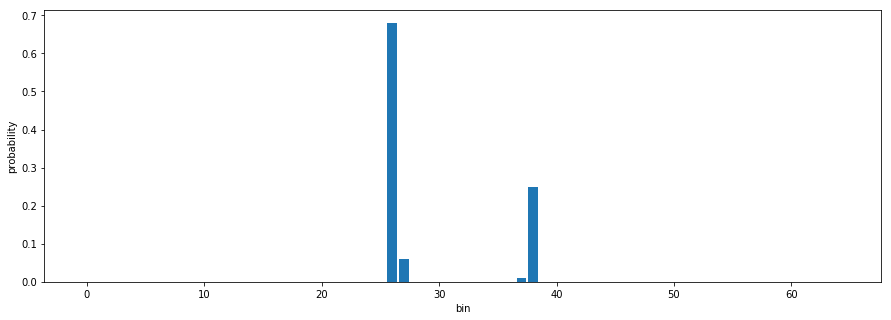

Predicted:


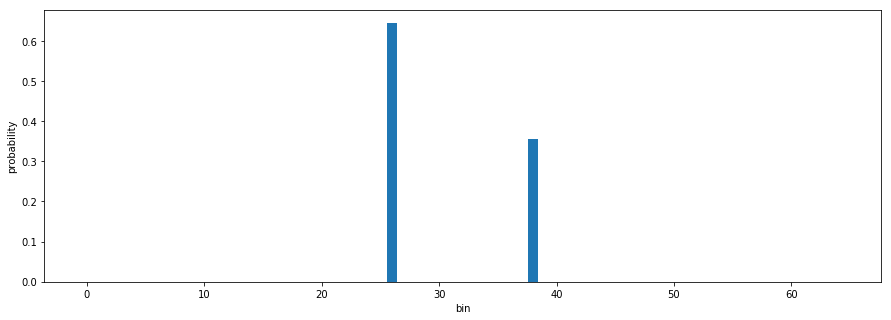

In [17]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

print("Label:")
plt.figure(figsize=(15,5))
plt.bar(np.arange(65), y_test.values[n],align='center')
plt.ylabel('probability')
plt.xlabel('bin')
plt.show()

print("Predicted:")
plt.figure(figsize=(15,5))
plt.bar(np.arange(65),predictions,align='center')
plt.ylabel('probability')
plt.xlabel('bin')
plt.show()